In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

### Cargar datos

In [38]:
datos = pd.read_csv("DATA_ESTRUCTURA_DBSCAN.csv", delimiter=",")
datos.dropna( inplace = True )
datos

,8,9;13
5,2;6,9.0
10,1;15,3.0
13,7;24,7.0
13,2;23,7.0
4,2;3,45.0
...,...,...
3,5;3,2.0
3,5;12,5.0
4,5;2,8.0
6,5;5,2.0


In [ ]:
# datos = np.loadtxt("casas.csv", delimiter=",")
datos = pd.read_csv("DATA_ESTRUCTURA.csv", delimiter=",")
datos.dropna( inplace = True )
datos

In [ ]:
datos['FECHA']=pd.to_datetime(datos['FECHA'], format='%d/%m/%y')
datos['ALTURA'] = datos['ALTURA'].replace('[^\d]','.',regex=True).astype(float)
datos['DAP'] = datos['DAP'].replace('[^\d]','.',regex=True).astype(float)
datos['TIPO'] = datos['TIPO'].astype(int)       
datos['ESTADO'] = datos['ESTADO'].astype(int)       
datos.info()
datos

In [30]:
data_estructura = datos[['ALTURA','DAP']]
print(data_estructura)
data_estructura['ALTURA']

       ALTURA   DAP
0         8.9  13.0
1         5.2   6.9
2        10.1  15.3
3        13.7  24.7
4        13.2  23.7
...       ...   ...
10249     3.0   4.3
10250    10.0  11.5
10251     3.0   7.0
10252    14.0  14.4
10253     2.0   2.7

[10236 rows x 2 columns]


0         8.9
1         5.2
2        10.1
3        13.7
4        13.2
         ... 
10249     3.0
10250    10.0
10251     3.0
10252    14.0
10253     2.0
Name: ALTURA, Length: 10236, dtype: float64

### Identificar Clusters


In [25]:
clusters = DBSCAN(eps=3, min_samples=5).fit_predict(data_estructura)
print(clusters)

[0 0 0 ... 0 0 0]


### Gráfica de matplotlib para mostrar los Clusters

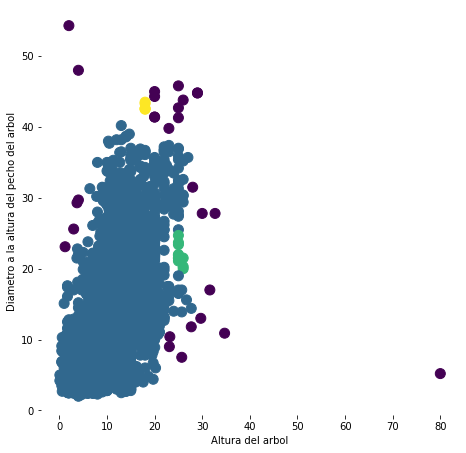

In [32]:
plt.figure(figsize=(7.5, 7.5))

plt.scatter(data_estructura['ALTURA'], data_estructura['DAP'], c=clusters, s=100)
plt.xlabel("Altura del arbol")
plt.ylabel("Diametro a la altura del pecho del arbol")
plt.box(False)
plt.show()